In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import scipy as sc
from pandas import Series,DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pylab import savefig


from collections import OrderedDict
from fractions import Fraction

get_ipython().magic(u'matplotlib inline')
mpl.rcParams['figure.figsize'] = (10.0, 5)

# import seaborn as sns
# # plt.rcParams
# import seaborn as sns
# color = sns.color_palette()
# import warnings
# warnings.filterwarnings('ignore') 
# #Supress unnecessary warnings for readability and cleaner presentation

In [2]:
aisles=pd.read_csv("aisles.csv")
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
departments=pd.read_csv("departments.csv")
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [4]:
orders=pd.read_csv("orders.csv")
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
products=pd.read_csv("products.csv")
products.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
aisles_merge=pd.merge(products,aisles,on="aisle_id",how="inner")
aisles_merge.head()

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes
2,102,Danish Butter Cookies,61,19,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes


In [7]:
dept_merge=pd.merge(departments,aisles_merge,on="department_id",how="inner")
dept_merge.head()

,department_id,department,product_id,product_name,aisle_id,aisle
0,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,frozen meals
1,1,frozen,30,"Three Cheese Ziti, Marinara with Meatballs",38,frozen meals
2,1,frozen,36,Traditional Lasagna with Meat Sauce Savory Ita...,38,frozen meals
3,1,frozen,81,Blakes Chicken Parmesan Dinner,38,frozen meals
4,1,frozen,100,Peanut Butter & Strawberry Jam Sandwich,38,frozen meals


In [8]:
prior=pd.read_csv("order_products_train_500k.csv")
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [9]:
df4=pd.merge(dept_merge,prior, on="product_id",how="inner")
df4.head()


,department_id,department,product_id,product_name,aisle_id,aisle,order_id,add_to_cart_order,reordered
0,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,frozen meals,317499,13,0
1,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,frozen meals,459014,6,1
2,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,frozen meals,508627,13,0
3,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,frozen meals,732095,8,1
4,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,frozen meals,770868,6,1


In [10]:
finaldf=pd.merge(orders,df4,on="order_id",how="inner")
finaldf.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department_id,department,product_id,product_name,aisle_id,aisle,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,7,beverages,196,Soda,77,soft drinks,1,1
1,1187899,1,train,11,4,8,14.0,7,beverages,46149,Zero Calorie Cola,77,soft drinks,11,1
2,1187899,1,train,11,4,8,14.0,14,breakfast,13032,Cinnamon Toast Crunch,121,cereal,7,1
3,1187899,1,train,11,4,8,14.0,16,dairy eggs,38928,0% Greek Strained Yogurt,120,yogurt,3,1
4,1187899,1,train,11,4,8,14.0,16,dairy eggs,25133,Organic String Cheese,21,packaged cheese,2,1


In [11]:
unique_aisle_names = finaldf["aisle"].unique()
unique_aisle_names
len(unique_aisle_names)


134

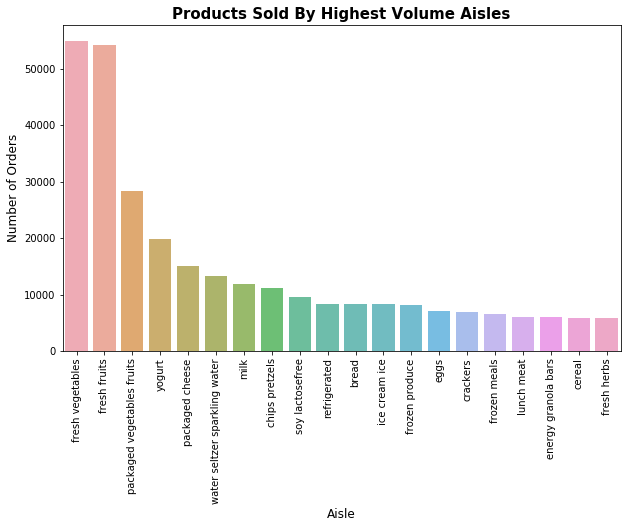

fresh vegetables                 54999
fresh fruits                     54177
packaged vegetables fruits       28389
yogurt                           19904
packaged cheese                  15076
water seltzer sparkling water    13254
milk                             11875
chips pretzels                   11191
soy lactosefree                   9543
refrigerated                      8422
bread                             8403
ice cream ice                     8330
frozen produce                    8193
eggs                              7183
crackers                          6991
frozen meals                      6638
lunch meat                        6113
energy granola bars               6066
cereal                            5901
fresh herbs                       5899
Name: aisle, dtype: int64

<Figure size 720x360 with 0 Axes>

In [12]:
aisle_freq = finaldf['aisle'].value_counts().head(20)
plt.figure(figsize=(10,6))
sns.barplot(aisle_freq.index, aisle_freq.values, alpha=0.8)
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.title('Products Sold By Highest Volume Aisles', fontsize=15,fontweight="bold")
plt.xticks(rotation='vertical')
plt.show()
plt.savefig("aisles.png",bbox_inches="tight")
aisle_freq

In [13]:
r1, r2 = 0, 19
def createList(r1, r2):
    return list(range(r1, r2+1))
print(createList(r1, r2))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


fresh vegetables                 0.109998
fresh fruits                     0.108354
packaged vegetables fruits       0.056778
yogurt                           0.039808
packaged cheese                  0.030152
water seltzer sparkling water    0.026508
milk                             0.023750
chips pretzels                   0.022382
soy lactosefree                  0.019086
refrigerated                     0.016844
bread                            0.016806
ice cream ice                    0.016660
frozen produce                   0.016386
eggs                             0.014366
crackers                         0.013982
frozen meals                     0.013276
lunch meat                       0.012226
energy granola bars              0.012132
cereal                           0.011802
fresh herbs                      0.011798
Name: aisle, dtype: float64

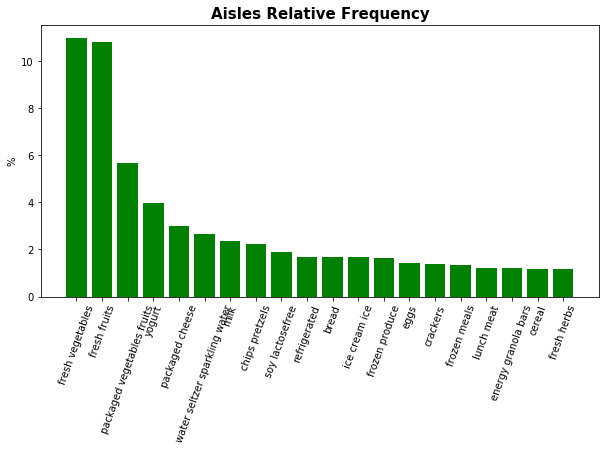

In [14]:
top_aisles = finaldf.groupby("aisle").filter(lambda x: len(x) >= 5899)
series = top_aisles["aisle"].value_counts() / len(finaldf)
indx = createList(r1, r2)
plt.bar(indx, series*100, color="green")
plt.ylabel("%")
plt.title("Aisles Relative Frequency",fontsize=15,fontweight="bold")
plt.xticks(indx, series.index, rotation=70)
# plt.title("Department Relative Rules",fontsize=15,fontweight="bold")
plt.savefig("Aisles_relative_freq.png", bbox_inches="tight")

series
# plt.savefig('aisle_freqeuncy.jpg')

# top_26_freq_prod = finaldf.groupby(‘product_name’).filter(lambda x: len(x) >= 1200)
# series = top_26_freq_prod[‘product_name’].value_counts() / len(finaldf)
# indx = createList(r1, r2)
# plt.bar(indx, series*100, color=‘green’)
# plt.ylabel(‘%’)
# plt.title(‘Relative fequency’)
# plt.xticks(indx, series.index, rotation=70)
# series

In [15]:
# basket=(finaldf[finaldf["order_id"]=="2539329"]\
#         .groupby(["order_id","product_name"])["order_id"]\
#         .count().unstack().reset_index().fillna(0)
#         .set_index("order_id")
# )
# basket=(finaldf.groupby(["order_id","product_name"]).count()["reordered"])
# a = basket.to_frame()
#         #.unstack()\
#          #.reset_index().fillna(0))
#         # .set_index("order_id"))
# b = a.reset_index().drop(columns =["order_id"])

# c = b.T
# c.head(5)

basket1=(finaldf.
        groupby(["order_id","aisle"])["reordered"]
        .count().unstack().reset_index().fillna(0)
        .set_index("order_id"))

basket1

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227622,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1227633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1227666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
basket1.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [17]:
def encode_units(x):
    if x <=0:
        return 0
    if x>=1:
        return 1
basket_sets1=basket1.applymap(encode_units)   
basket_sets1

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227622,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1227633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1227666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
frequent_itemsets=apriori(basket_sets1,min_support=0.20,use_colnames=True)
rules=association_rules(frequent_itemsets, metric="lift",min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(fresh fruits),(fresh vegetables),0.549508,0.453502,0.329621,0.599847,1.322698,0.080417,1.365721
1,(fresh vegetables),(fresh fruits),0.453502,0.549508,0.329621,0.726834,1.322698,0.080417,1.649148
2,(fresh fruits),(packaged vegetables fruits),0.549508,0.382487,0.286397,0.521188,1.362628,0.076217,1.289676
3,(packaged vegetables fruits),(fresh fruits),0.382487,0.549508,0.286397,0.748775,1.362628,0.076217,1.793182
4,(packaged vegetables fruits),(fresh vegetables),0.382487,0.453502,0.252732,0.660759,1.457012,0.079273,1.610940
5,(fresh vegetables),(packaged vegetables fruits),0.453502,0.382487,0.252732,0.557289,1.457012,0.079273,1.394843
6,"(fresh fruits, fresh vegetables)",(packaged vegetables fruits),0.329621,0.382487,0.204223,0.619571,1.619847,0.078148,1.623200
7,"(fresh fruits, packaged vegetables fruits)",(fresh vegetables),0.286397,0.453502,0.204223,0.713078,1.572380,0.074342,1.904691
8,"(packaged vegetables fruits, fresh vegetables)",(fresh fruits),0.252732,0.549508,0.204223,0.808064,1.470522,0.065345,2.347093
9,(fresh fruits),"(packaged vegetables fruits, fresh vegetables)",0.549508,0.252732,0.204223,0.371648,1.470522,0.065345,1.189250


In [19]:
rules_by_lift = rules.sort_values(by="lift", ascending=False)
rules_by_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,"(fresh fruits, fresh vegetables)",(packaged vegetables fruits),0.329621,0.382487,0.204223,0.619571,1.619847,0.078148,1.623200
11,(packaged vegetables fruits),"(fresh fruits, fresh vegetables)",0.382487,0.329621,0.204223,0.533935,1.619847,0.078148,1.438382
7,"(fresh fruits, packaged vegetables fruits)",(fresh vegetables),0.286397,0.453502,0.204223,0.713078,1.572380,0.074342,1.904691
10,(fresh vegetables),"(fresh fruits, packaged vegetables fruits)",0.453502,0.286397,0.204223,0.450325,1.572380,0.074342,1.298227
8,"(packaged vegetables fruits, fresh vegetables)",(fresh fruits),0.252732,0.549508,0.204223,0.808064,1.470522,0.065345,2.347093
9,(fresh fruits),"(packaged vegetables fruits, fresh vegetables)",0.549508,0.252732,0.204223,0.371648,1.470522,0.065345,1.189250
4,(packaged vegetables fruits),(fresh vegetables),0.382487,0.453502,0.252732,0.660759,1.457012,0.079273,1.610940
5,(fresh vegetables),(packaged vegetables fruits),0.453502,0.382487,0.252732,0.557289,1.457012,0.079273,1.394843
2,(fresh fruits),(packaged vegetables fruits),0.549508,0.382487,0.286397,0.521188,1.362628,0.076217,1.289676
3,(packaged vegetables fruits),(fresh fruits),0.382487,0.549508,0.286397,0.748775,1.362628,0.076217,1.793182


In [20]:
basket_sets1["fresh fruits"].sum()

26100

In [21]:
basket_sets1["fresh vegetables"].sum()

21540

In [22]:
rules_2=rules[(rules["lift"]>=1.32) & 
     (rules["confidence"]>=0.55)] 
rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(fresh fruits),(fresh vegetables),0.549508,0.453502,0.329621,0.599847,1.322698,0.080417,1.365721
1,(fresh vegetables),(fresh fruits),0.453502,0.549508,0.329621,0.726834,1.322698,0.080417,1.649148
3,(packaged vegetables fruits),(fresh fruits),0.382487,0.549508,0.286397,0.748775,1.362628,0.076217,1.793182
4,(packaged vegetables fruits),(fresh vegetables),0.382487,0.453502,0.252732,0.660759,1.457012,0.079273,1.610940
5,(fresh vegetables),(packaged vegetables fruits),0.453502,0.382487,0.252732,0.557289,1.457012,0.079273,1.394843
6,"(fresh fruits, fresh vegetables)",(packaged vegetables fruits),0.329621,0.382487,0.204223,0.619571,1.619847,0.078148,1.623200
7,"(fresh fruits, packaged vegetables fruits)",(fresh vegetables),0.286397,0.453502,0.204223,0.713078,1.572380,0.074342,1.904691
8,"(packaged vegetables fruits, fresh vegetables)",(fresh fruits),0.252732,0.549508,0.204223,0.808064,1.470522,0.065345,2.347093


In [23]:
rules_2.to_csv("final_aisles.csv")

In [24]:
cols = ['antecedents','consequents']
rules_2[cols] = rules_2[cols].applymap(lambda x: tuple(x))
rules_2.head()

C:\Users\priya\Anaconda3\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(fresh fruits,)","(fresh vegetables,)",0.549508,0.453502,0.329621,0.599847,1.322698,0.080417,1.365721
1,"(fresh vegetables,)","(fresh fruits,)",0.453502,0.549508,0.329621,0.726834,1.322698,0.080417,1.649148
3,"(packaged vegetables fruits,)","(fresh fruits,)",0.382487,0.549508,0.286397,0.748775,1.362628,0.076217,1.793182
4,"(packaged vegetables fruits,)","(fresh vegetables,)",0.382487,0.453502,0.252732,0.660759,1.457012,0.079273,1.610940
5,"(fresh vegetables,)","(packaged vegetables fruits,)",0.453502,0.382487,0.252732,0.557289,1.457012,0.079273,1.394843


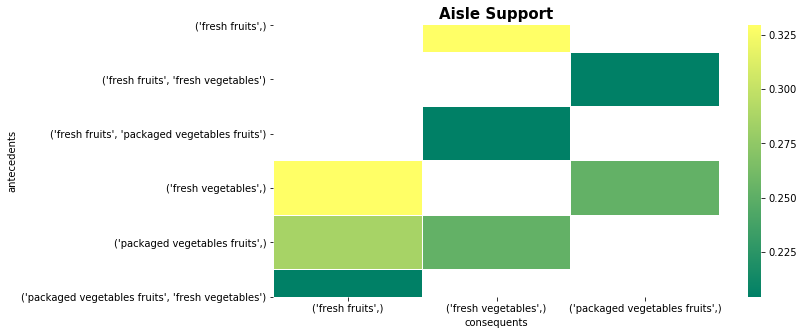

In [43]:
data = rules_2.pivot_table(index='antecedents', columns='consequents', values='support')
plt.title("Aisle Support",fontsize=15,fontweight="bold")


ax = sns.heatmap(data, linewidths=0.1,cmap="summer")
plt.savefig("aisle_support.png", bbox_inches="tight")

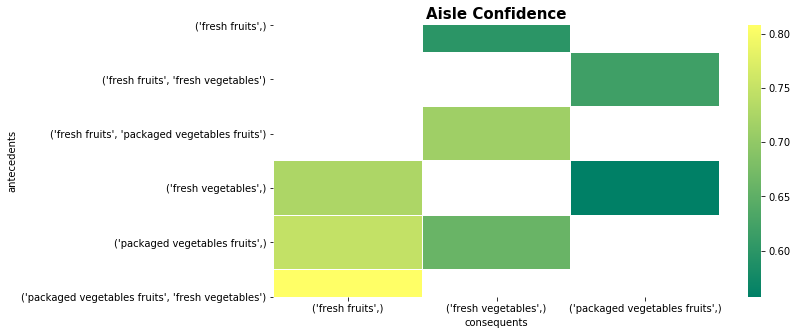

In [42]:
data = rules_2.pivot_table(index='antecedents', columns='consequents', values='confidence')
plt.title("Aisle Confidence",fontsize=15,fontweight="bold")


ax = sns.heatmap(data, linewidths=0.1,cmap="summer")
plt.savefig("aisle_confidence.png", bbox_inches="tight")

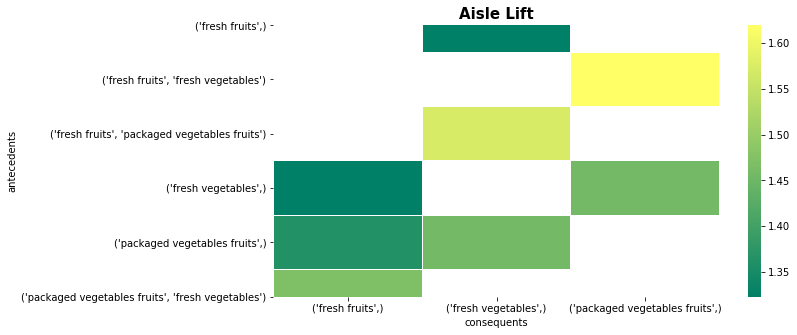

In [44]:
data = rules_2.pivot_table(index='antecedents', columns='consequents', values='lift')
plt.title("Aisle Lift",fontsize=15,fontweight="bold")


ax = sns.heatmap(data, linewidths=0.1,cmap="summer")
plt.savefig("aisle_lift.png", bbox_inches="tight")


In [45]:
# rules'fresh fruits'].sum()

In [46]:
import networkx as nx


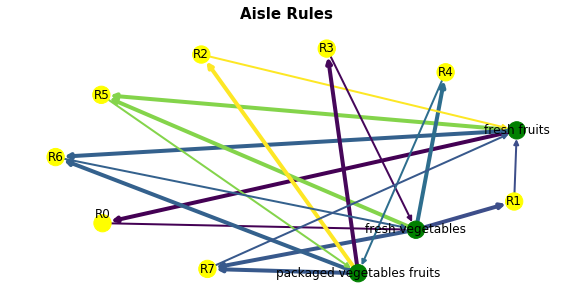

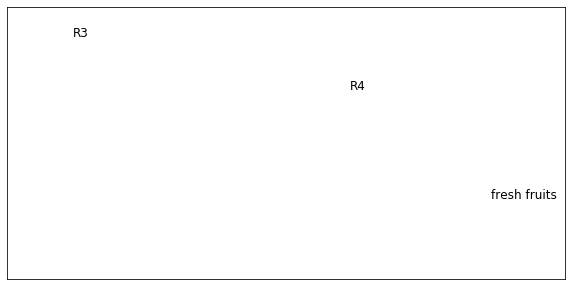

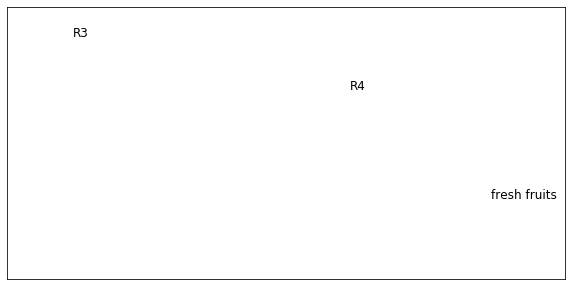

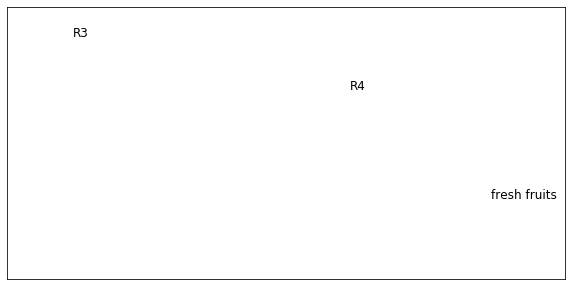

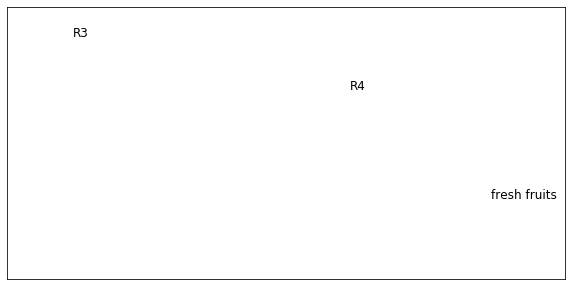

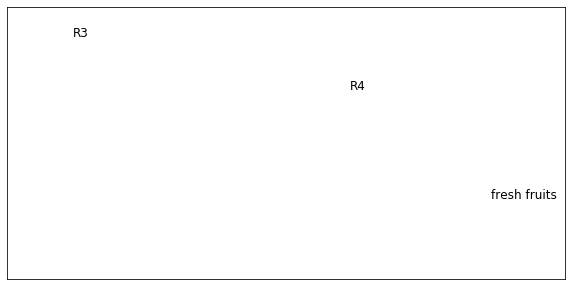

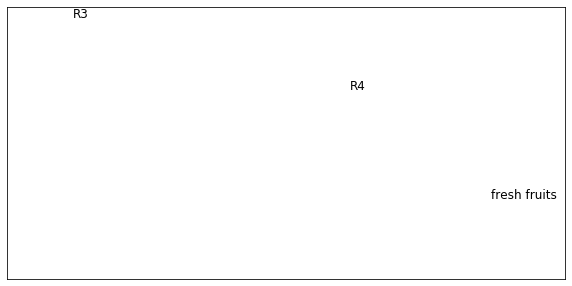

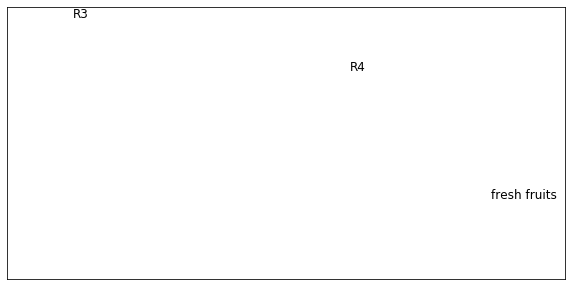

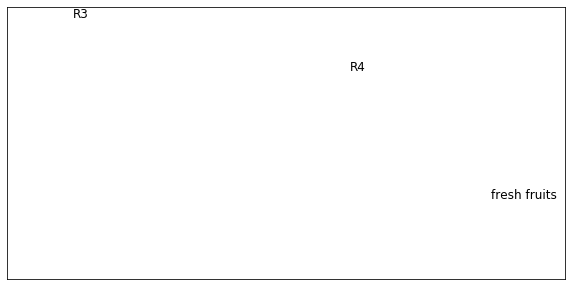

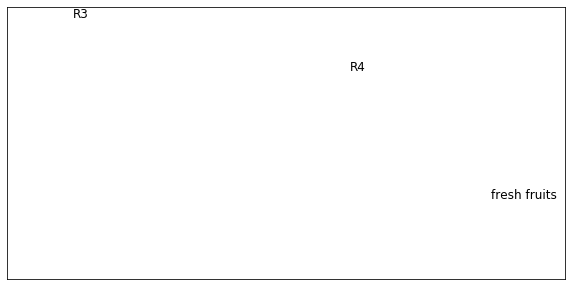

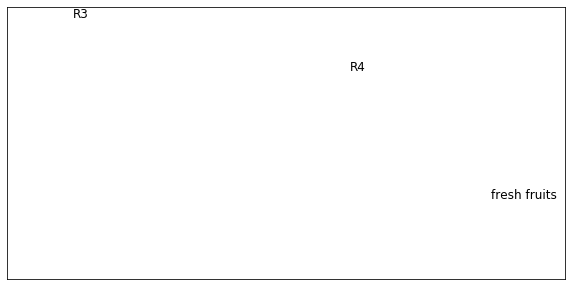

<Figure size 720x360 with 0 Axes>

In [47]:
def draw_graph(rules_2, rules_to_show):
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        for a in rules_2.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 4)
        for c in rules_2.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, 
            with_labels=False)            

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
        nx.draw_networkx_labels(G1, pos)
        plt.show()
plt.title("Aisle Rules",fontsize=15,fontweight="bold")

figure=draw_graph (rules_2, 8) 
plt.savefig("Aisle_rules.png", bbox_inches="tight")



In [40]:
import numpy as np
import scipy as sc
from pandas import Series,DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from collections import OrderedDict
from fractions import Fraction

get_ipython().magic(u'matplotlib inline')
mpl.rcParams['figure.figsize'] = (10.0, 5)

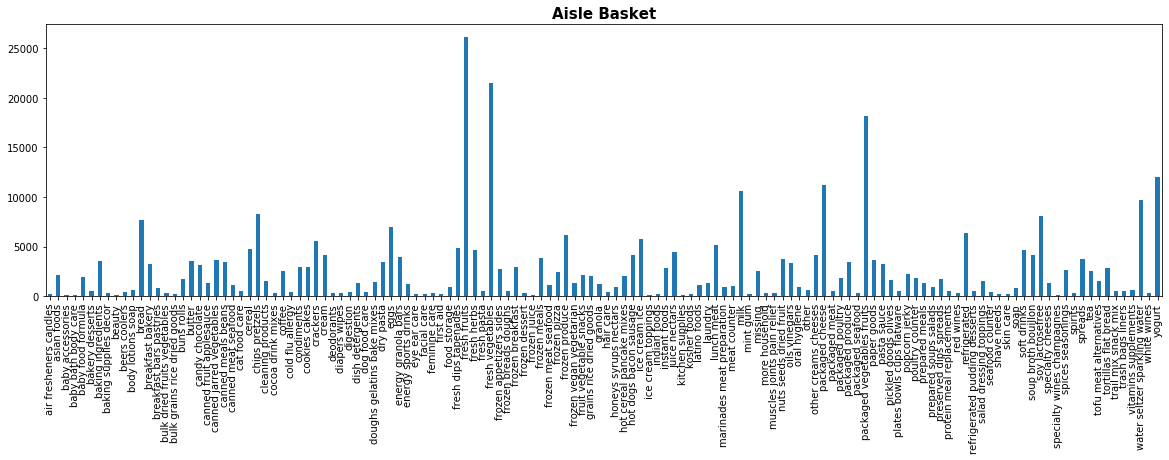

In [41]:

product_support_dict = {}
for column in basket_sets1.columns:
    product_support_dict[column] = sum(basket_sets1[column]>0)
 
# visualise support
fig=pd.Series(product_support_dict).plot(kind="bar",figsize=(20,5))
plt.title("Aisle Basket",fontsize=15,fontweight="bold")
plt.savefig("aisle_basket.png", bbox_inches="tight")




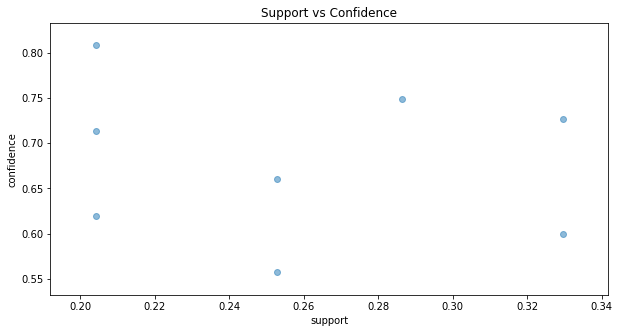

In [33]:
# Support V/s Confidence
plt.scatter(rules_2['support'], rules_2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

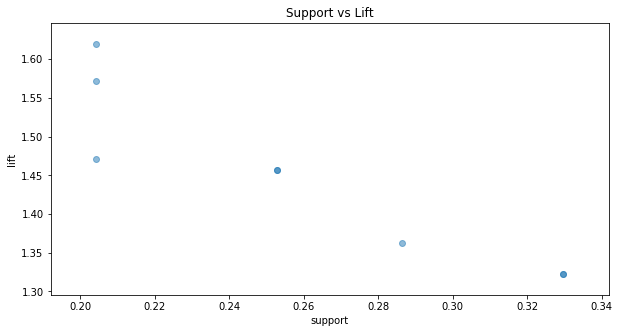

In [34]:
# Support V/s Lift

plt.scatter(rules_2['support'], rules_2['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

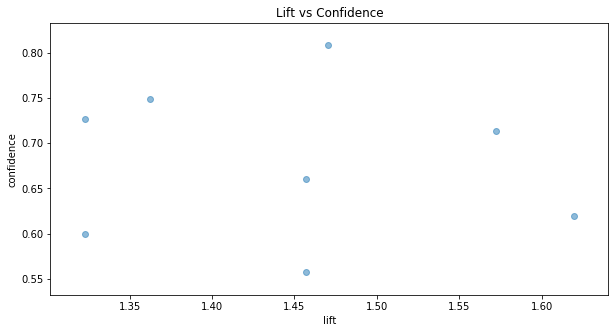

In [35]:
# Lift V/s Confidence

plt.scatter(rules_2['lift'], rules_2['confidence'], alpha=0.5)
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('Lift vs Confidence')
plt.show()


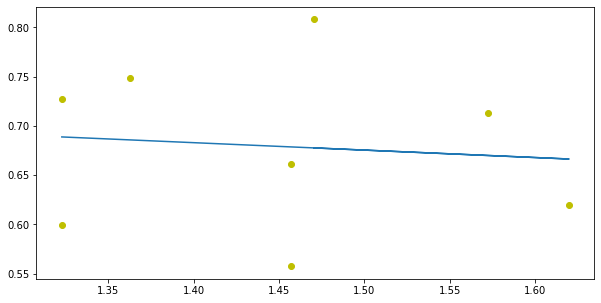

In [36]:
fit=np.polyfit(rules_2['lift'],rules_2['confidence'],1)
fit_fn=np.poly1d(fit)
plt.plot(rules_2['lift'],rules_2['confidence'],'yo',rules_2['lift'],
        fit_fn(rules_2['lift']))
plt.show()
